<a href="https://colab.research.google.com/github/PraveenKumar-06/Captcha-Project-AIET-Group-6/blob/master/EMNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install emnist

In [0]:
from __future__ import print_function
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from emnist import extract_training_samples

Using TensorFlow backend.


In [0]:

# Input image dimensions
img_rows, img_cols = 28, 28
num_classes = 26

X, y = extract_training_samples('letters')

X = X.reshape(124800, 28, 28)
y = y.reshape(124800, 1)

y = y-1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Rescale the image values to [0, 1]
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:

####### Step 2: Designing the model############

model = Sequential()  
model.add(Conv2D(32, kernel_size=(3, 3),  
         activation='relu',  
         input_shape=input_shape))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))  #droping elements to reduce dimensionality
model.add(Dropout(0.25))  
model.add(Flatten())  
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  

W0627 10:23:45.379469 140613322557312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 10:23:45.421480 140613322557312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 10:23:45.429790 140613322557312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 10:23:45.456489 140613322557312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0627 10:23:45.459054 140613322557312 deprecation_wrapp

In [0]:
# Comple the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0627 10:23:58.147978 140613322557312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 10:23:58.156285 140613322557312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# Model variables
batch_size = 128
num_classes = 26
epochs = 20

# Train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


W0627 10:24:05.751935 140613322557312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 93600 samples, validate on 31200 samples
Epoch 1/20
93600/93600 [==============================] - 12s 127us/step - loss: 0.9967 - acc: 0.6954 - val_loss: 0.3733 - val_acc: 0.8791
Epoch 2/20
93600/93600 [==============================] - 5s 51us/step - loss: 0.5152 - acc: 0.8371 - val_loss: 0.2897 - val_acc: 0.9054
Epoch 3/20
93600/93600 [==============================] - 5s 51us/step - loss: 0.4378 - acc: 0.8614 - val_loss: 0.2570 - val_acc: 0.9164
Epoch 4/20
93600/93600 [==============================] - 5s 51us/step - loss: 0.3909 - acc: 0.8765 - val_loss: 0.2581 - val_acc: 0.9159
Epoch 5/20
93600/93600 [==============================] - 5s 52us/step - loss: 0.3644 - acc: 0.8836 - val_loss: 0.2300 - val_acc: 0.9238
Epoch 6/20
93600/93600 [==============================] - 5s 52us/step - loss: 0.3382 - acc: 0.8925 - val_loss: 0.2222 - val_acc: 0.9269
Epoch 7/20
93600/93600 [==============================] - 5s 52us/step - loss: 0.3253 - acc: 0.8965 - val_loss: 0.2154 - val_a

In [0]:

# Evaluate the model using Accuracy and Loss
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18809459161252165
Test accuracy: 0.9380128205128205


24
0.9999745


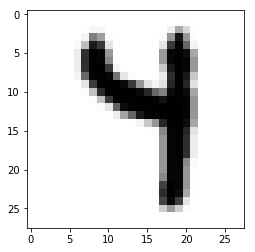

In [0]:
import matplotlib.pyplot as plt
image_index = 29500
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(pred.max())

5
0.9729706


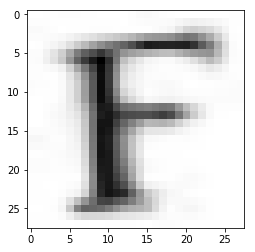

In [0]:
import cv2
import numpy as np
img = cv2.imread('crop1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
img = cv2.resize(img, (28, 28))
img = np.array(img)
img = img.astype('float32')/255
pred = model.predict(img.reshape(1,28,28,1))[0]
prob = np.max(pred)
pred = np.argmax(pred)
print(pred)
print(prob)
import matplotlib.pyplot as plt
plt.imshow(img,cmap='Greys')

In [0]:
import pickle
filename = 'EMNIST.sav'
pickle.dump(model, open(filename, 'wb'))